In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
data_path = "D:/WORK/수원대학교/2023수원대학교 데이터과학 경진대회(국민건강영양조사 데이터분석)/data/nationalhealth_2010to2021.csv"

In [183]:
class Health_Check:
    def __init__(self, input_data, legacy_data):
        self.input_data =pd.read_csv(input_data).query("age >= 65 and cfam ==1 and fam_rela == 1")
        self.legacy_data = pd.read_csv(legacy_data).query("age >= 65 and cfam ==1 and fam_rela == 1")
        
        self.input_years = self.input_data["year"].unique()
        self.legacy_years = self.legacy_data["year"].unique()
        self.disease_names = self.legacy_data.iloc[:,-13:].columns.to_list()
        self.nu_names = self.legacy_data.iloc[:,92:109].columns.to_list()
        self.dict_region = {'서울': 1, '부산': 2,'대구': 3,'인천': 4,'광주': 5,
                            '대전': 6,'울산': 7,'세종': 8,'경기': 9,'강원': 10,
                            '충북': 11,'충남': 12,'전북': 13,'전남': 14,'경북': 15,
                            '경남': 16,'제주': 17}
        self.lst_nu = ['식품섭취량', '에너지', '수분', '단백질', '지방', '탄수화물', '칼슘', '인', '철', '나트륨',
                        '칼륨', '베타카로틴', '레티놀', '티아민', '리보플라빈', '나이아신', '비타민C']
        
        self.legacy_data_서울 = self.legacy_data[self.legacy_data["region"] == self.dict_region["서울"]]
        self.legacy_data_부산 = self.legacy_data[self.legacy_data["region"] == self.dict_region["부산"]]
        self.legacy_data_대구 = self.legacy_data[self.legacy_data["region"] == self.dict_region["대구"]]
        self.legacy_data_인천 = self.legacy_data[self.legacy_data["region"] == self.dict_region["인천"]]
        self.legacy_data_광주 = self.legacy_data[self.legacy_data["region"] == self.dict_region["광주"]]
        self.legacy_data_대전 = self.legacy_data[self.legacy_data["region"] == self.dict_region["대전"]]
        self.legacy_data_울산 = self.legacy_data[self.legacy_data["region"] == self.dict_region["울산"]]
        self.legacy_data_세종 = self.legacy_data[self.legacy_data["region"] == self.dict_region["세종"]]
        self.legacy_data_경기 = self.legacy_data[self.legacy_data["region"] == self.dict_region["경기"]]
        self.legacy_data_강원 = self.legacy_data[self.legacy_data["region"] == self.dict_region["강원"]]
        self.legacy_data_충북 = self.legacy_data[self.legacy_data["region"] == self.dict_region["충북"]]
        self.legacy_data_충남 = self.legacy_data[self.legacy_data["region"] == self.dict_region["충남"]]
        self.legacy_data_전북 = self.legacy_data[self.legacy_data["region"] == self.dict_region["전북"]]
        self.legacy_data_전남 = self.legacy_data[self.legacy_data["region"] == self.dict_region["전남"]]
        self.legacy_data_경북 = self.legacy_data[self.legacy_data["region"] == self.dict_region["경북"]]
        self.legacy_data_경남 = self.legacy_data[self.legacy_data["region"] == self.dict_region["경남"]]
        self.legacy_data_제주 = self.legacy_data[self.legacy_data["region"] == self.dict_region["제주"]]
        
        self.input_data_서울 = self.input_data[self.input_data["region"] == self.dict_region["서울"]]
        self.input_data_부산 = self.input_data[self.input_data["region"] == self.dict_region["부산"]]
        self.input_data_대구 = self.input_data[self.input_data["region"] == self.dict_region["대구"]]
        self.input_data_인천 = self.input_data[self.input_data["region"] == self.dict_region["인천"]]
        self.input_data_광주 = self.input_data[self.input_data["region"] == self.dict_region["광주"]]
        self.input_data_대전 = self.input_data[self.input_data["region"] == self.dict_region["대전"]]
        self.input_data_울산 = self.input_data[self.input_data["region"] == self.dict_region["울산"]]
        self.input_data_세종 = self.input_data[self.input_data["region"] == self.dict_region["세종"]]
        self.input_data_경기 = self.input_data[self.input_data["region"] == self.dict_region["경기"]]
        self.input_data_강원 = self.input_data[self.input_data["region"] == self.dict_region["강원"]]
        self.input_data_충북 = self.input_data[self.input_data["region"] == self.dict_region["충북"]]
        self.input_data_충남 = self.input_data[self.input_data["region"] == self.dict_region["충남"]]
        self.input_data_전북 = self.input_data[self.input_data["region"] == self.dict_region["전북"]]
        self.input_data_전남 = self.input_data[self.input_data["region"] == self.dict_region["전남"]]
        self.input_data_경북 = self.input_data[self.input_data["region"] == self.dict_region["경북"]]
        self.input_data_경남 = self.input_data[self.input_data["region"] == self.dict_region["경남"]]
        self.input_data_제주 = self.input_data[self.input_data["region"] == self.dict_region["제주"]]
        
        self.lst_legacy_pop =  [len(self.legacy_data),len(self.legacy_data_강원),len(self.legacy_data_경기),len(self.legacy_data_경남),
                                len(self.legacy_data_경북),len(self.legacy_data_광주),len(self.legacy_data_대구),len(self.legacy_data_대전),
                                len(self.legacy_data_부산), len(self.legacy_data_서울),len(self.legacy_data_세종),len(self.legacy_data_울산),
                                len(self.legacy_data_인천),len(self.legacy_data_전남),len(self.legacy_data_전북),len(self.legacy_data_충남),
                                len(self.legacy_data_충북),len(self.legacy_data_제주)]
        
        self.lst_input_pop =   [len(self.input_data),len(self.input_data_강원),len(self.input_data_경기),len(self.input_data_경남),
                                len(self.input_data_경북),len(self.input_data_광주),len(self.input_data_대구),len(self.input_data_대전),
                                len(self.input_data_부산),len(self.input_data_서울),len(self.input_data_세종),len(self.input_data_울산),
                                len(self.input_data_인천),len(self.input_data_전남),len(self.input_data_전북),len(self.input_data_충남),
                                len(self.input_data_충북),len(self.input_data_제주)]
                        
        # self.lst_legacy_pop= [len(self.legacy_data)]
        # for region_name in self.dict_region.keys():
        #     self.lst_legacy_pop.append(len(self.legacy_data.query("region == {}".format(self.dict_region[region_name]))))
        
        
        
    # 기능(1. 전국 - 지역 2. 지역 - 지역 3. 년도-년도간의 비교)
    def disease_check(self, search_region, compare_region= "", between_year=""):
        self.disease_legacy_data = self.legacy_data.iloc[:,-13:]
        self.disease_input_data = self.input_data.iloc[:,-13:]
        
        def sumdiseasedata(x):
            disease = []
            for name in self.disease_names:
                if 1 in x[name].value_counts().index:
                    if len(x[name].value_counts()) == 3:
                        disease.append(x[name].value_counts().values[2])
                    else: disease.append(x[name].value_counts()[1])
                else: disease.append(0)
            df_disease = pd.DataFrame(np.array(disease).reshape(-1,13))
            df_disease.columns = self.disease_names
            return df_disease
        

        
        self.sum_disease_legacy_data_전국 = sumdiseasedata(self.disease_legacy_data)    
        self.sum_disease_legacy_data_강원 = sumdiseasedata(self.legacy_data_강원)
        self.sum_disease_legacy_data_경기 = sumdiseasedata(self.legacy_data_경기)
        self.sum_disease_legacy_data_경남 = sumdiseasedata(self.legacy_data_경남)
        self.sum_disease_legacy_data_경북 = sumdiseasedata(self.legacy_data_경북)
        self.sum_disease_legacy_data_광주 = sumdiseasedata(self.legacy_data_광주)
        self.sum_disease_legacy_data_대구 = sumdiseasedata(self.legacy_data_대구)
        self.sum_disease_legacy_data_대전 = sumdiseasedata(self.legacy_data_대전)
        self.sum_disease_legacy_data_부산 = sumdiseasedata(self.legacy_data_부산)
        self.sum_disease_legacy_data_서울 = sumdiseasedata(self.legacy_data_서울)
        self.sum_disease_legacy_data_세종 = sumdiseasedata(self.legacy_data_세종)
        self.sum_disease_legacy_data_울산 = sumdiseasedata(self.legacy_data_울산)
        self.sum_disease_legacy_data_인천 = sumdiseasedata(self.legacy_data_인천)
        self.sum_disease_legacy_data_전남 = sumdiseasedata(self.legacy_data_전남)
        self.sum_disease_legacy_data_전북 = sumdiseasedata(self.legacy_data_전북)
        self.sum_disease_legacy_data_충남 = sumdiseasedata(self.legacy_data_충남)
        self.sum_disease_legacy_data_충북 = sumdiseasedata(self.legacy_data_충북)
        self.sum_disease_legacy_data_제주 = sumdiseasedata(self.legacy_data_제주)
        self.sum_disease_legacy_data_all =pd.concat([
                          self.sum_disease_legacy_data_전국,self.sum_disease_legacy_data_강원,self.sum_disease_legacy_data_경기,
                          self.sum_disease_legacy_data_경남,self.sum_disease_legacy_data_경북,self.sum_disease_legacy_data_광주,
                          self.sum_disease_legacy_data_대구,self.sum_disease_legacy_data_대전,self.sum_disease_legacy_data_부산,
                          self.sum_disease_legacy_data_서울,self.sum_disease_legacy_data_세종,self.sum_disease_legacy_data_울산,
                          self.sum_disease_legacy_data_인천,self.sum_disease_legacy_data_전남,self.sum_disease_legacy_data_전북,
                          self.sum_disease_legacy_data_충남,self.sum_disease_legacy_data_충북,self.sum_disease_legacy_data_제주
                          ])
        self.sum_disease_legacy_data_all.index = ["전국", "강원", "경기", "경남", "경북", "광주", "대구", "대전", "부산", "서울", "세종", "울산",
                             "인천", "전남", "전북", "충남", "충북", "제주"]
        
        self.sum_disease_input_data_전국 = sumdiseasedata(self.disease_input_data)    
        self.sum_disease_input_data_강원 = sumdiseasedata(self.input_data_강원)
        self.sum_disease_input_data_경기 = sumdiseasedata(self.input_data_경기)
        self.sum_disease_input_data_경남 = sumdiseasedata(self.input_data_경남)
        self.sum_disease_input_data_경북 = sumdiseasedata(self.input_data_경북)
        self.sum_disease_input_data_광주 = sumdiseasedata(self.input_data_광주)
        self.sum_disease_input_data_대구 = sumdiseasedata(self.input_data_대구)
        self.sum_disease_input_data_대전 = sumdiseasedata(self.input_data_대전)
        self.sum_disease_input_data_부산 = sumdiseasedata(self.input_data_부산)
        self.sum_disease_input_data_서울 = sumdiseasedata(self.input_data_서울)
        self.sum_disease_input_data_세종 = sumdiseasedata(self.input_data_세종)
        self.sum_disease_input_data_울산 = sumdiseasedata(self.input_data_울산)
        self.sum_disease_input_data_인천 = sumdiseasedata(self.input_data_인천)
        self.sum_disease_input_data_전남 = sumdiseasedata(self.input_data_전남)
        self.sum_disease_input_data_전북 = sumdiseasedata(self.input_data_전북)
        self.sum_disease_input_data_충남 = sumdiseasedata(self.input_data_충남)
        self.sum_disease_input_data_충북 = sumdiseasedata(self.input_data_충북)
        self.sum_disease_input_data_제주 = sumdiseasedata(self.input_data_제주)
        self.sum_disease_input_data_all =pd.concat([self.sum_disease_input_data_전국,self.sum_disease_input_data_강원,self.sum_disease_input_data_경기,
                                                    self.sum_disease_input_data_경남,self.sum_disease_input_data_경북,self.sum_disease_input_data_광주,
                                                    self.sum_disease_input_data_대구,self.sum_disease_input_data_대전,self.sum_disease_input_data_부산,
                                                    self.sum_disease_input_data_서울,self.sum_disease_input_data_세종,self.sum_disease_input_data_울산,
                                                    self.sum_disease_input_data_인천,self.sum_disease_input_data_전남,self.sum_disease_input_data_전북,
                                                    self.sum_disease_input_data_충남,self.sum_disease_input_data_충북,self.sum_disease_input_data_제주,
                                                    ])
        self.sum_disease_input_data_all.index = ["전국", "강원", "경기", "경남", "경북", "광주", "대구", "대전", "부산", "서울", "세종", "울산",
                             "인천", "전남", "전북", "충남", "충북", "제주"]
        
        self.sum_disease_legacy_data_all_ratio = (self.sum_disease_legacy_data_all.T/ self.lst_legacy_pop).T
        self.sum_disease_input_data_all_ratio = (self.sum_disease_input_data_all.T/ self.lst_input_pop).T
        
        
        if compare_region == "" and between_year == "":
            result = self.sum_disease_input_data_all.loc["전국"] - self.sum_disease_input_data_all.loc[search_region]
            result_ratio = (self.sum_disease_input_data_all_ratio.loc["전국"] - self.sum_disease_input_data_all_ratio.loc[search_region])
            result_ratio = result_ratio*100
    
            print("****"*15)
            print("{}지역의 독거노인은 전국의 독거노인보다 ".format(search_region))
            for disease in self.disease_names:
                print("{}을(를) {}({:.2f}%)만큼 더(덜) 걸렸습니다".format(disease, result[disease],result_ratio[disease]))
            print("****"*15)
            
            plt.figure(figsize=(8,5), dpi=150)
            plt.bar(np.arange(13)-0.15, self.sum_disease_input_data_all_ratio.loc["전국"] ,width=0.5)
            plt.bar(np.arange(13)+0.15, self.sum_disease_input_data_all_ratio.loc[search_region], width=0.5)
            plt.xticks(np.arange(13), self.disease_names, rotation = 270)
            plt.yticks(np.arange(0,self.sum_disease_input_data_all_ratio.loc["전국"].values.max(),0.1), 
                       [ str(int(x*100))+"%" for x in (np.arange(0,self.sum_disease_input_data_all_ratio.loc["전국"].values.max(),0.1))])
            plt.title("전국과 {}지역의 독거노인 질병 비교".format(search_region))
            plt.legend(["전국","{}".format(search_region)])
            plt.grid(axis = "y")

            # plt.savefig("독거노인과 비독거노인 질병 비교.jpeg")
            
            print("****"*15)
            print("{}지역의 질병 비율은 다음과 같습니다: ".format(search_region))
            
            plt.figure(figsize=(10,10), dpi =150, facecolor="white")
            X = self.sum_disease_input_data_all.loc[search_region].sort_values()
            wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
            plt.pie(X, labels= X.index.to_list(),autopct='%.1f%%',  wedgeprops=wedgeprops)
            plt.title("{}지역의 독거노인 질병 원그래프".format(search_region))

            # plt.savefig("{}독거 노인 질병 원그래프.jpeg".format)
            print("****"*15)
                
    
        if compare_region != "" and between_year == "":
            result = self.sum_disease_input_data_all.loc[compare_region] - self.sum_disease_input_data_all.loc[search_region]
            result_ratio = (self.sum_disease_input_data_all_ratio.loc[compare_region] - self.sum_disease_input_data_all_ratio.loc[search_region])
            result_ratio = result_ratio*100
            print("****"*15)
            print("{}지역의 독거노인은 {}의 독거노인보다 ".format(search_region,compare_region))
            for disease in self.disease_names:
                print("{}을(를) {}({:.2f}%)만큼 더(덜) 걸렸습니다".format(disease, result[disease],result_ratio[disease]))
            print("****"*15)
            
            plt.figure(figsize=(8,5), dpi=150)
            plt.bar(np.arange(13)-0.15, self.sum_disease_input_data_all_ratio.loc[compare_region] ,width=0.5)
            plt.bar(np.arange(13)+0.15, self.sum_disease_input_data_all_ratio.loc[search_region], width=0.5)
            plt.xticks(np.arange(13), self.disease_names, rotation = 270)
            plt.yticks(np.arange(0,self.sum_disease_input_data_all_ratio.loc[compare_region].values.max(),0.1), 
                    [ str(int(x*100))+"%" for x in (np.arange(0,self.sum_disease_input_data_all_ratio.loc[compare_region].values.max(),0.1))])
            plt.title("{}지역과 {}지역의 독거노인 질병 비교".format(compare_region, search_region))
            plt.legend([compare_region,"{}".format(search_region)])
            plt.grid(axis = "y")

            # plt.savefig("독거노인과 비독거노인 질병 비교.jpeg")
            
        if compare_region == "" and between_year != "":
            self.search_year = between_year[0]
            self.compare_year = between_year[1]
            
            if self.search_year in self.input_data["year"].unique():
                search_year_data = self.input_data.query("year == {} and region == {}".format(self.search_year, self.dict_region[search_region]))
            else : 
                search_year_data = self.legacy_data.query("year == {} and region == {}".format(self.search_year, self.dict_region[search_region]))
            compare_year_data = self.legacy_data.query("year == {} and region == {}".format(self.compare_year, self.dict_region[search_region]))
            
            sum_search_year_data = sumdiseasedata(search_year_data)
            sum_compare_year_data = sumdiseasedata(compare_year_data)
            
            lst_year_pop = [len(search_year_data), len(compare_year_data)]
      
            result = sum_search_year_data - sum_compare_year_data
            result_ratio = sum_search_year_data/lst_year_pop[0] - sum_compare_year_data/lst_year_pop[1]
            result_ratio = result_ratio*100
            
            print("****"*15)
            print("{}지역의 독거노인 {}년도보다 {}년도에 ".format(search_region, self.compare_year, self.search_year))
            for disease in self.disease_names:
                print("{}을(를) {}({:.3f}%)만큼 더(덜) 걸렸습니다".format(disease, result[disease][0],result_ratio[disease][0]))
            print("****"*15)
            plt.figure(figsize=(8,5), dpi=150)
            Y1 = (sum_search_year_data/lst_year_pop[0]).values[0]
            Y2 = (sum_compare_year_data/lst_year_pop[1]).values[0]
            plt.bar(np.arange(13)-0.15, Y1, width=0.5)
            plt.bar(np.arange(13)+0.15, Y2, width=0.5)
            plt.xticks(np.arange(13), self.disease_names, rotation = 270)
            plt.yticks(np.arange(0,max([Y1.max(),Y2.max()]),0.1), 
                       [ str(int(x*100))+"%" for x in (np.arange(0,max([Y1.max(),Y2.max()]),0.1))])
            plt.title("{}지역의 {}년도와 {}년도 독거노인 질병 비교".format(search_region, self.search_year, self.compare_year))
            plt.legend(["{}년".format(self.search_year),"{}년".format(self.compare_year)])
            plt.grid(axis = "y")
            
            
            
            
            
    def nu_check(self, search_region, compare_region= "", between_year=""):
        def sumnudata(x):
            df_nu = x.iloc[:,92:109].sum(axis=0)
            return df_nu
        self.sum_nu_legacy_data_전국 = sumnudata(self.legacy_data)    
        self.sum_nu_legacy_data_강원 = sumnudata(self.legacy_data_강원)
        self.sum_nu_legacy_data_경기 = sumnudata(self.legacy_data_경기)
        self.sum_nu_legacy_data_경남 = sumnudata(self.legacy_data_경남)
        self.sum_nu_legacy_data_경북 = sumnudata(self.legacy_data_경북)
        self.sum_nu_legacy_data_광주 = sumnudata(self.legacy_data_광주)
        self.sum_nu_legacy_data_대구 = sumnudata(self.legacy_data_대구)
        self.sum_nu_legacy_data_대전 = sumnudata(self.legacy_data_대전)
        self.sum_nu_legacy_data_부산 = sumnudata(self.legacy_data_부산)
        self.sum_nu_legacy_data_서울 = sumnudata(self.legacy_data_서울)
        self.sum_nu_legacy_data_세종 = sumnudata(self.legacy_data_세종)
        self.sum_nu_legacy_data_울산 = sumnudata(self.legacy_data_울산)
        self.sum_nu_legacy_data_인천 = sumnudata(self.legacy_data_인천)
        self.sum_nu_legacy_data_전남 = sumnudata(self.legacy_data_전남)
        self.sum_nu_legacy_data_전북 = sumnudata(self.legacy_data_전북)
        self.sum_nu_legacy_data_충남 = sumnudata(self.legacy_data_충남)
        self.sum_nu_legacy_data_충북 = sumnudata(self.legacy_data_충북)
        self.sum_nu_legacy_data_제주 = sumnudata(self.legacy_data_제주)
        self.sum_nu_legacy_data_all =pd.concat([
                        self.sum_nu_legacy_data_전국,self.sum_nu_legacy_data_강원,self.sum_nu_legacy_data_경기,
                        self.sum_nu_legacy_data_경남,self.sum_nu_legacy_data_경북,self.sum_nu_legacy_data_광주,
                        self.sum_nu_legacy_data_대구,self.sum_nu_legacy_data_대전,self.sum_nu_legacy_data_부산,
                        self.sum_nu_legacy_data_서울,self.sum_nu_legacy_data_세종,self.sum_nu_legacy_data_울산,
                        self.sum_nu_legacy_data_인천,self.sum_nu_legacy_data_전남,self.sum_nu_legacy_data_전북,
                        self.sum_nu_legacy_data_충남,self.sum_nu_legacy_data_충북,self.sum_nu_legacy_data_제주
                        ],axis = 1)
        self.sum_nu_legacy_data_all = self.sum_nu_legacy_data_all.T
        self.sum_nu_legacy_data_all.index = ["전국", "강원", "경기", "경남", "경북", "광주", "대구", "대전", "부산", "서울", "세종", "울산",
                            "인천", "전남", "전북", "충남", "충북", "제주"]
        
        self.sum_nu_input_data_전국 = sumnudata(self.input_data)    
        self.sum_nu_input_data_강원 = sumnudata(self.input_data_강원)
        self.sum_nu_input_data_경기 = sumnudata(self.input_data_경기)
        self.sum_nu_input_data_경남 = sumnudata(self.input_data_경남)
        self.sum_nu_input_data_경북 = sumnudata(self.input_data_경북)
        self.sum_nu_input_data_광주 = sumnudata(self.input_data_광주)
        self.sum_nu_input_data_대구 = sumnudata(self.input_data_대구)
        self.sum_nu_input_data_대전 = sumnudata(self.input_data_대전)
        self.sum_nu_input_data_부산 = sumnudata(self.input_data_부산)
        self.sum_nu_input_data_서울 = sumnudata(self.input_data_서울)
        self.sum_nu_input_data_세종 = sumnudata(self.input_data_세종)
        self.sum_nu_input_data_울산 = sumnudata(self.input_data_울산)
        self.sum_nu_input_data_인천 = sumnudata(self.input_data_인천)
        self.sum_nu_input_data_전남 = sumnudata(self.input_data_전남)
        self.sum_nu_input_data_전북 = sumnudata(self.input_data_전북)
        self.sum_nu_input_data_충남 = sumnudata(self.input_data_충남)
        self.sum_nu_input_data_충북 = sumnudata(self.input_data_충북)
        self.sum_nu_input_data_제주 = sumnudata(self.input_data_제주)
        self.sum_nu_input_data_all =pd.concat([
                            self.sum_nu_input_data_전국,self.sum_nu_input_data_강원,self.sum_nu_input_data_경기,
                            self.sum_nu_input_data_경남,self.sum_nu_input_data_경북,self.sum_nu_input_data_광주,
                            self.sum_nu_input_data_대구,self.sum_nu_input_data_대전,self.sum_nu_input_data_부산,
                            self.sum_nu_input_data_서울,self.sum_nu_input_data_세종,self.sum_nu_input_data_울산,
                            self.sum_nu_input_data_인천,self.sum_nu_input_data_전남,self.sum_nu_input_data_전북,
                            self.sum_nu_input_data_충남,self.sum_nu_input_data_충북,self.sum_nu_input_data_제주,
                            ],axis = 1)
        self.sum_nu_input_data_all = self.sum_nu_input_data_all.T
        self.sum_nu_input_data_all.index = ["전국", "강원", "경기", "경남", "경북", "광주", "대구", "대전", "부산", "서울", "세종", "울산",
                             "인천", "전남", "전북", "충남", "충북", "제주"]
        
        
        self.sum_nu_legacy_data_all_aver = (self.sum_nu_legacy_data_all.T/ self.lst_legacy_pop).T
        self.sum_nu_input_data_all_aver = (self.sum_nu_input_data_all.T/ self.lst_input_pop).T
        
        result_aver = self.sum_nu_input_data_all_aver.loc[search_region] - self.sum_nu_input_data_all_aver.loc["전국"] 
        
        print("****"*15)
        print("{}지역의 독거노인은 ".format(search_region))
        for i, nu in enumerate(self.nu_names):
            print("{}({})가 {:.3f}만큼 전국 독거노인 평균과 차이가 납니다".format((self.lst_nu[i]), nu, result_aver[nu]))
        print("****"*15)
        
        plt.figure(figsize=(20,20), dpi=150)
        for i in range(17):
            plt.subplot(3,6,i+1)
            plt.bar([0],self.sum_nu_input_data_all_aver.loc["전국"].iloc[i],width=0.45)
            plt.bar([0.5],self.sum_nu_input_data_all_aver.loc[search_region].iloc[i],width=0.45)
            plt.xticks([0, 0.5], ["전국 평균", "{}지역 평균".format(search_region)])
            plt.title(self.lst_nu[i])
            
            # plt.savefig("독거노인 영양소 평균 비교.jpeg")
                 

In [184]:
ohs = Health_Check("D:/WORK/수원대학교/2023수원대학교 데이터과학 경진대회(국민건강영양조사 데이터분석)/data/nationalhealth_2010to2021.csv", "D:/WORK/수원대학교/2023수원대학교 데이터과학 경진대회(국민건강영양조사 데이터분석)/data/nationalhealth_2010to2021.csv")

************************************************************
부산지역의 독거노인은 
식품섭취량(N_INTK)가 84.796만큼 전국 독거노인 평균과 차이가 납니다
에너지(N_EN)가 20.490만큼 전국 독거노인 평균과 차이가 납니다
수분(N_WATER)가 75.142만큼 전국 독거노인 평균과 차이가 납니다
단백질(N_PROT)가 2.197만큼 전국 독거노인 평균과 차이가 납니다
지방(N_FAT)가 0.874만큼 전국 독거노인 평균과 차이가 납니다
탄수화물(N_CHO)가 -0.479만큼 전국 독거노인 평균과 차이가 납니다
칼슘(N_CA)가 39.460만큼 전국 독거노인 평균과 차이가 납니다
인(N_PHOS)가 40.388만큼 전국 독거노인 평균과 차이가 납니다
철(N_FE)가 0.137만큼 전국 독거노인 평균과 차이가 납니다
나트륨(N_NA)가 92.761만큼 전국 독거노인 평균과 차이가 납니다
칼륨(N_K)가 151.964만큼 전국 독거노인 평균과 차이가 납니다
베타카로틴(N_CAROT)가 258.673만큼 전국 독거노인 평균과 차이가 납니다
레티놀(N_RETIN)가 18.064만큼 전국 독거노인 평균과 차이가 납니다
티아민(N_B1)가 0.048만큼 전국 독거노인 평균과 차이가 납니다
리보플라빈(N_B2)가 0.124만큼 전국 독거노인 평균과 차이가 납니다
나이아신(N_NIAC)가 0.617만큼 전국 독거노인 평균과 차이가 납니다
비타민C(N_VITC)가 11.103만큼 전국 독거노인 평균과 차이가 납니다
************************************************************


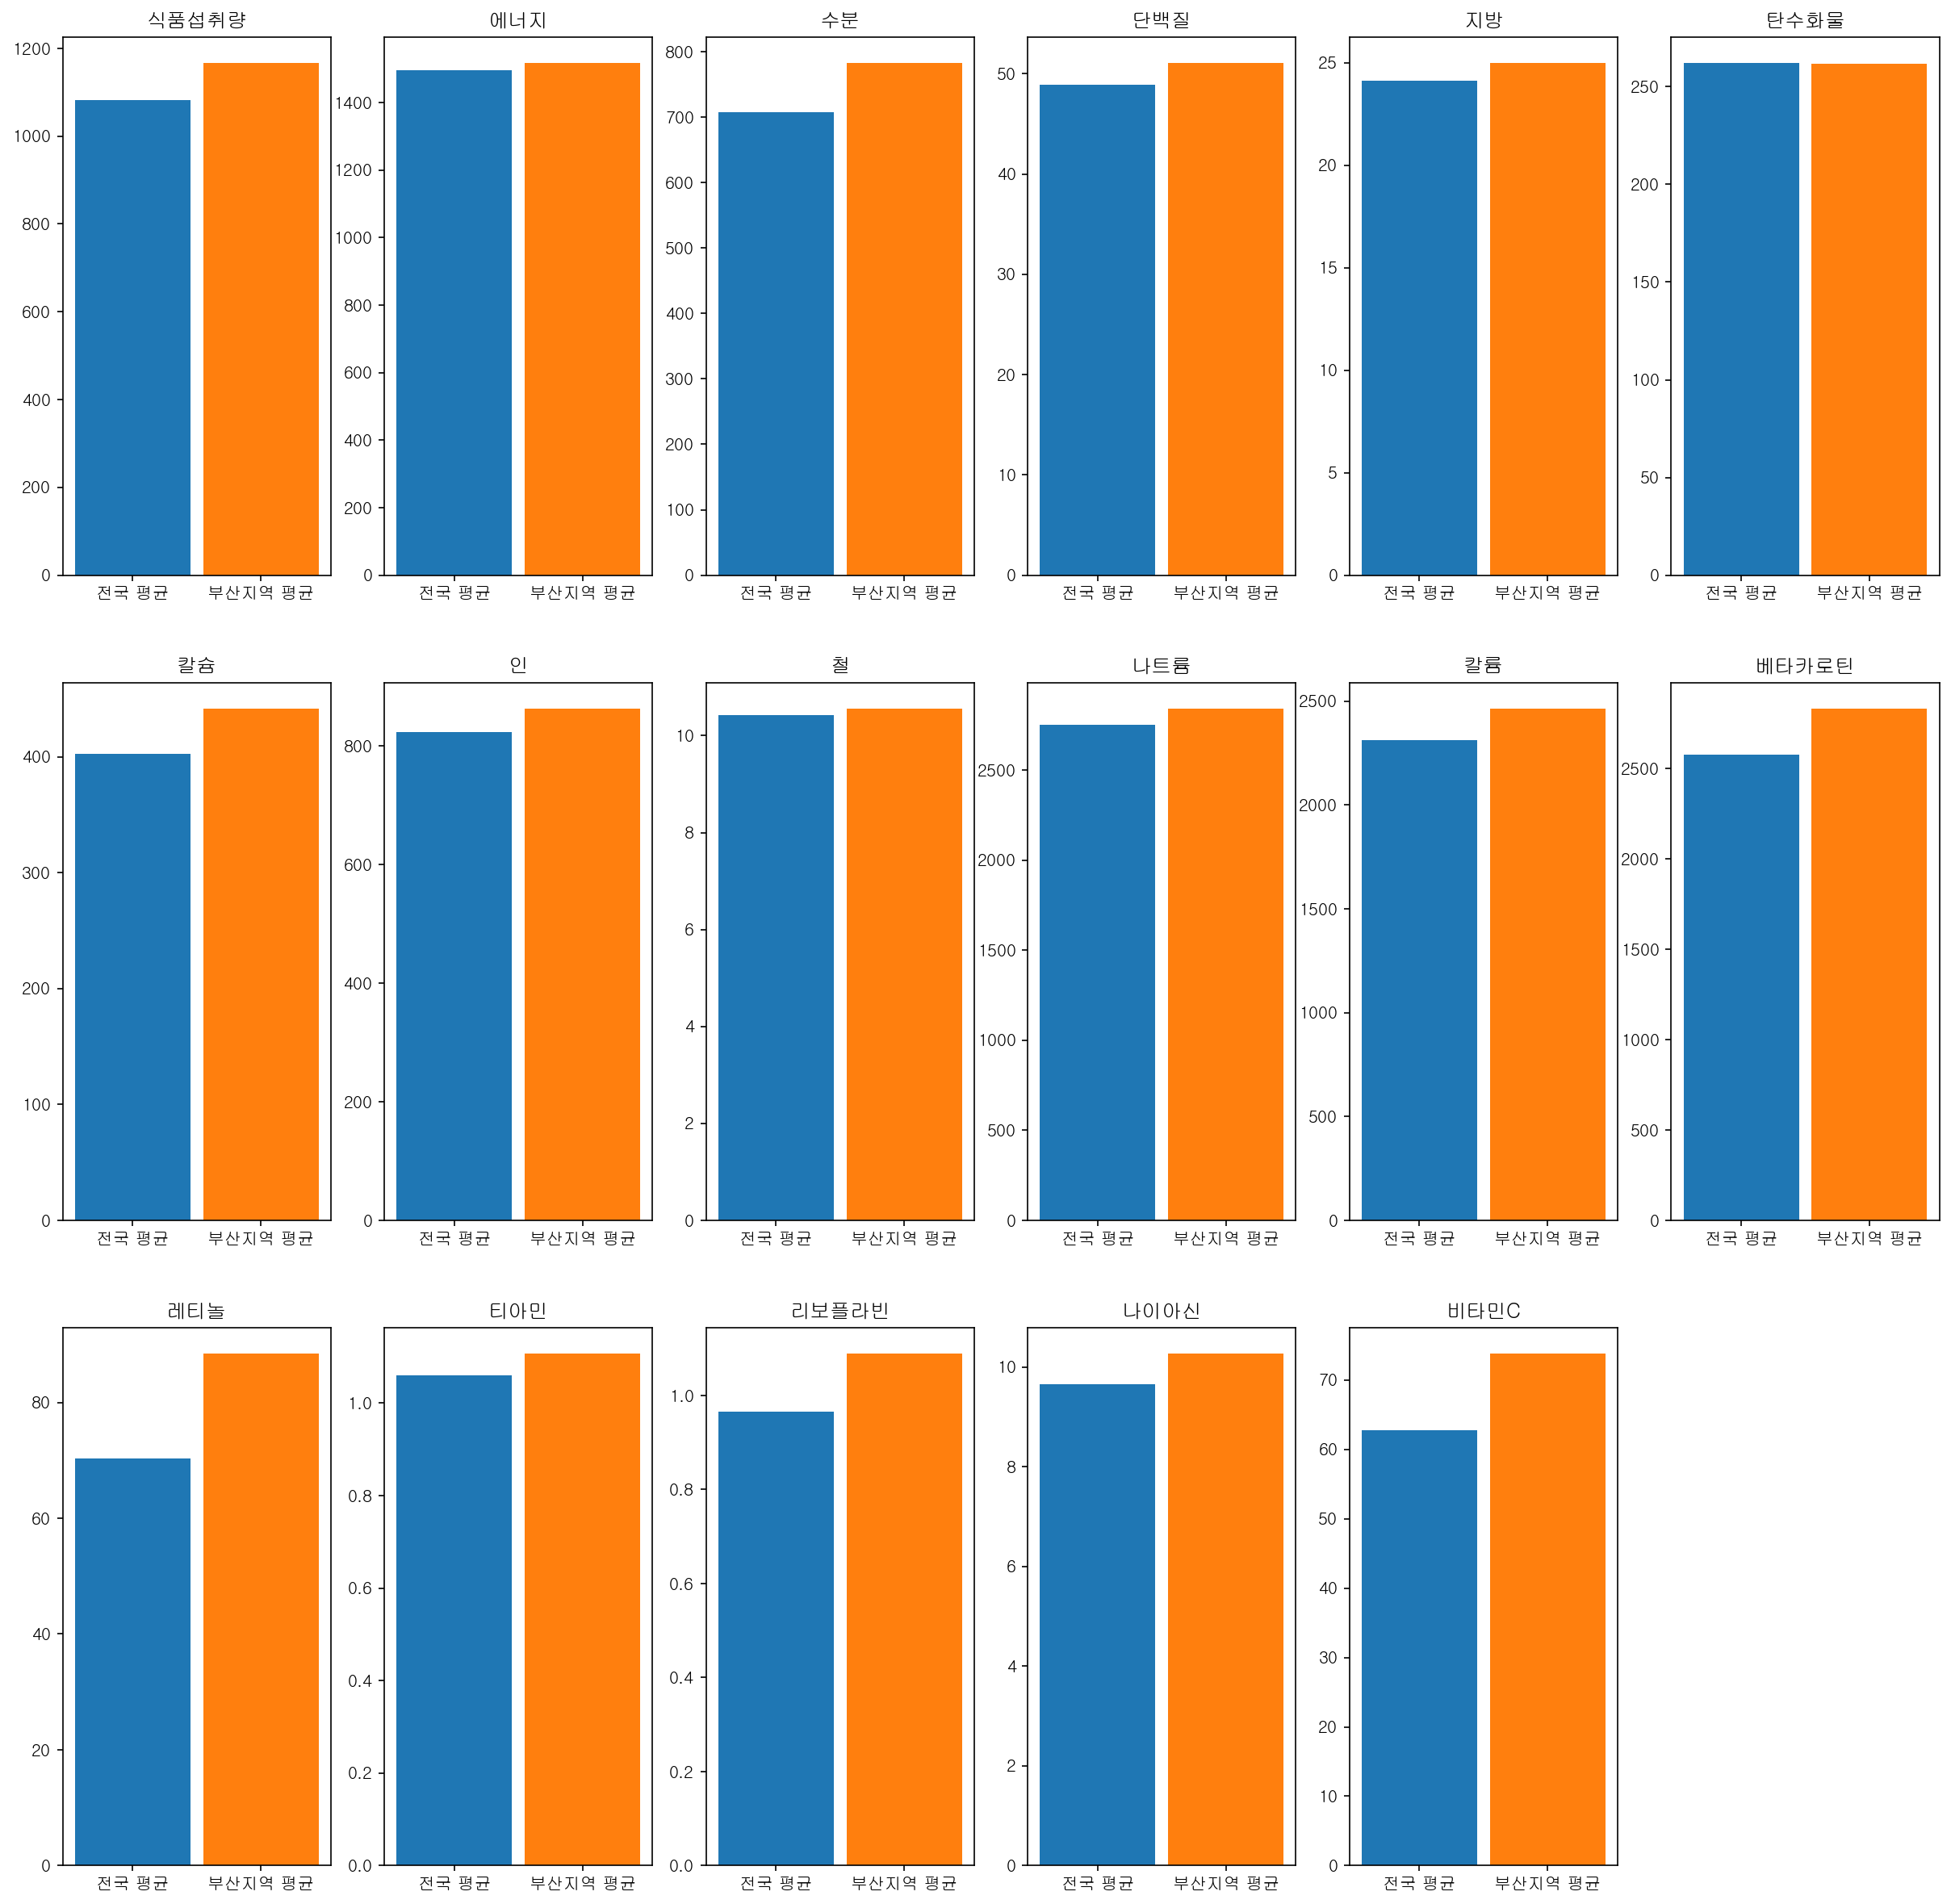

In [185]:
ohs.nu_check("부산")